# scikit-learn TUTORIAL

# Importing libraries and packages

In [102]:
# Importing libraries and packages
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier # from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline



In [103]:
# Now load the dataset we'll be using
wine= pd.read_csv("winequality-red.csv", sep=",") # sep stands for what separates the data


In [104]:
wine.head(5)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [105]:
wine.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [106]:
wine.isnull().sum() # would tell us how many null values are in each 
# In our case no null value in every column, as all = 0


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Preprocessing of Data


In [107]:
bins= (2, 6.5, 8) # this implies 2bins["bad", "good"], spread of 6.5(better quality), then upto index 8
group_names= ["bad", "good"]
wine["quality"] = pd.cut(wine["quality"], bins= bins, labels=group_names)

wine["quality"].unique()


['bad', 'good']
Categories (2, object): ['bad' < 'good']

In [108]:
label_quality=LabelEncoder()
wine["quality"]= label_quality.fit_transform(wine["quality"])
wine.head(10)

# this prints bad quality as 0, good quality as 1


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


In [109]:
wine["quality"].value_counts()
# will print total number of good quality and bad quality in the labels 0 and 1,,,good is above 6.5


quality
0    1382
1     217
Name: count, dtype: int64

KeyboardInterrupt: 

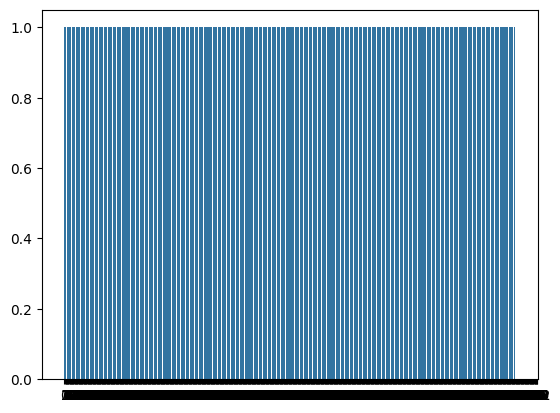

In [110]:
sns.countplot(wine['quality'])
plt.show()
# prints plot of the wine quality in terms of low and high
# the graph printed below has issues, will revisit later


In [ ]:
# Now separate the dataset as response variable and feature variables
X= wine.drop("quality", axis=1)
y= wine["quality"]


In [ ]:
# Then train and test spliting of data using the codeline below
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)


In [112]:
# Applying standard scaling to get optimized results
standardScaler1= StandardScaler() # will convert values like 102, 59...etc to level ply field
X_train= standardScaler1.fit_transform(X_train)
X_test= standardScaler1.transform(X_test)


# Models commonly used, setups

# 1. Random Forest Classifier

In [ ]:
# we had imported it earlier as from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier(n_estimators=200) # 200 represents models we have, trees in the forest
# the smaller it is, the better
rfc.fit(X_train, y_train)
pred_rfc= rfc.predict(X_test)

print(pred_rfc[:20]) # predicting good ones and bad ones for the first 20 wines


[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0]


In [ ]:
# The result above shows we have 3 good ones, and the rest 17 are bad

from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier(n_estimators=200) # 200 represents models we have, trees in the forest
# the smaller it is, the better
rfc.fit(X_train, y_train)
pred_rfc= rfc.predict(X_test)

print(X_test[:20]) # prints the first 20 values in our test, which are already scaled


[[-3.61859850e-01  1.64286407e-01 -9.85152962e-01 -3.86510130e-02
   5.18158057e-01 -1.81975648e-01 -1.99566462e-02  1.75731759e-01
  -4.65392578e-01 -1.34389336e-04 -7.77452782e-01]
 [-3.03840702e-01 -1.70525408e-01 -5.24491803e-01 -6.65728970e-01
  -1.30756387e-01  4.97010797e-01  1.68066777e+00 -4.17191190e-01
   5.08915214e-01 -1.03143815e+00 -8.72484283e-01]
 [ 1.37871461e+00  7.78108067e-01 -2.68568937e-01  1.00699644e-01
   3.76208022e-01  1.09018543e-01 -3.84376165e-01  1.95450060e+00
  -2.05577167e-01  1.83329452e+00 -4.92358280e-01]
 [ 1.02293339e-01 -3.93733284e-01  1.92092221e-01 -2.12839335e-01
  -2.11870693e-01  1.56398950e+00  3.44462872e-01  6.60850535e-01
   1.19192097e-01 -6.87670232e-01 -5.87389780e-01]
 [-9.42051337e-01 -3.93733284e-01 -1.66199791e-01 -5.96053642e-01
  -2.32149269e-01  2.06016607e-01 -3.84376165e-01 -1.06401623e+00
   5.08915214e-01 -3.43902311e-01  1.72862226e-01]
 [-6.51955593e-01 -6.72743130e-01  1.40907648e-01 -3.17352327e-01
  -1.10477811e-01  

# Checking how our model performed

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier(n_estimators=200) # 200 represents models we have, trees in the forest
# the smaller it is, the better
rfc.fit(X_train, y_train)
pred_rfc= rfc.predict(X_test)

print(classification_report(y_test, pred_rfc)) # shows how our model performed
# y is the actual values, while pred_rfc is our predicted


              precision    recall  f1-score   support

           0       0.92      0.97      0.94       273
           1       0.74      0.53      0.62        47

    accuracy                           0.90       320
   macro avg       0.83      0.75      0.78       320
weighted avg       0.90      0.90      0.90       320



In [ ]:
# We see 92% was precision for bad, and 78% for good wine
# The overall is 90%


In [ ]:
# checking where we went wrong with confusion matrix

from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier(n_estimators=200) # 200 represents models we have, trees in the forest
# the smaller it is, the better
rfc.fit(X_train, y_train)
pred_rfc= rfc.predict(X_test)

print(classification_report(y_test, pred_rfc)) # shows how our model performed
# y is the actual values, while pred_rfc is our predicted
print(confusion_matrix(y_test, pred_rfc)) # 


              precision    recall  f1-score   support

           0       0.92      0.96      0.94       273
           1       0.71      0.51      0.59        47

    accuracy                           0.90       320
   macro avg       0.81      0.74      0.77       320
weighted avg       0.89      0.90      0.89       320

[[263  10]
 [ 23  24]]


In [ ]:
# Shows we had 263 correct prediction, and 7 wrong for 0(bad wine)
# we correctly predicted 22 as good, and went wrong on 25 (miss-labels)


# 2. SVM Classifier (Support Vector Model)

In [ ]:
# syntax is almost same as above, just a little editing
clf= svm.SVC() # clf is a variable, you can label it as you wish
clf.fit(X_train, y_train)
pred_clf= clf.predict(X_test)

print(classification_report(y_test, pred_clf)) # shows how our model performed
# y is the actual values, while pred_rfc is our predicted
print(confusion_matrix(y_test, pred_clf)) # 


              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.38        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320

[[268   5]
 [ 35  12]]


In [ ]:
# For SVM classifier:
# # Shows we had 268 correct prediction, and 5 wrong for 0(bad wine)
# we correctly predicted 35 as good, and went wrong on 12(miss-labels)

# the data is randomly selected, so there might be changes when we run several times
# SVM classifier works better on smaller numbers
# RFC is good for numbers, mid-sized  data..research more


# 3. Neural Network

In [ ]:
# Best for big amounts of work, like stocks
# Works on different news feeds from business sources

mlpc= MLPClassifier(hidden_layer_sizes=(11,11,11), max_iter=500) 
mlpc.fit(X_train, y_train)
pred_mlpc= mlpc.predict(X_test)

print(classification_report(y_test, pred_mlpc)) # shows how our model performed
# y is the actual values, while pred_rfc is our predicted
print(confusion_matrix(y_test, pred_mlpc)) # 

# 11,11,11 represents nodes, the higher the nodes.no the higher the usage of system resources
# max_iter representes iterations...default is 200, higher one uses more system resources


              precision    recall  f1-score   support

           0       0.92      0.94      0.93       273
           1       0.59      0.51      0.55        47

    accuracy                           0.88       320
   macro avg       0.75      0.72      0.74       320
weighted avg       0.87      0.88      0.87       320

[[256  17]
 [ 23  24]]


c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# For Neural Network:
# # Shows we had 256 correct prediction, and 17 wrong for 0(bad wine)
# It mislabeled 17 bad wines as good
# we correctly predicted 23 as good, and went wrong on 24(miss-labels)
# It mislabeled 23 good wines as bad


# From the three, we now give the stakeholders one particular score

In [ ]:
# check the model with highest performance
from sklearn.metrics import accuracy_score
cm= accuracy_score(y_test, pred_rfc) 

print(cm)
# we use rfc because it performed best as seen above



0.875


In [111]:
wine.head(10)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


In [114]:
# Create random data again
XnewData= [[7.3, 0.58, 0.00, 2.0, 0.065, 15.0, 21.0, 0.9946, 3.36, 0.47, 10.0]]
XnewData= standardScaler1.transform(XnewData)
yNewData= rfc.predict(XnewData)

print(yNewData)


[0]


In [ ]:
# 0 result means it picked a bad wine for XnewData
